# <span style="color:red"> <strong> Palmer's Penguins Classification with Random Forest (Tensorflow)

## Load & Prepare the Dataset

In [32]:
import numpy as np
import pandas as pd

# Download the dataset
!wget -q https://storage.googleapis.com/download.tensorflow.org/data/palmer_penguins/penguins.csv -O /tmp/penguins.csv

df = pd.read_csv("/tmp/penguins.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


The dataset contains a mix of numerical and categorical features. `tensorflow_decision_forests` supports all these feature types and deal with missing values natively, therefore there is no need to preprocess in the form of one-hot encoding, normalization, or removal of rows containing missing values.

Keras metrics expect integers for labels. So we need to convert it into integers:

In [33]:
# %pip install tensorflow_decision_forests
import numpy as np
import math
import tensorflow as tf
import tensorflow_decision_forests as tfdf 
print("Found TensorFlow Decision Forests v" + tfdf.__version__)

Found TensorFlow Decision Forests v1.1.0


In [34]:
label = "species"
classes = df[label].unique().tolist()
print(f"Label classes: {classes}")
df[label] = df[label].map(classes.index)

Label classes: ['Adelie', 'Gentoo', 'Chinstrap']


In [35]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,0,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,0,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,0,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,0,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [36]:
#split the dataset into train/test sets
def split_dataset(df, test_size=0.3):
    test_indices = np.random.rand(len(df)) < test_size
    return df[~test_indices], df[test_indices]

train_ds_pd, test_ds_pd = split_dataset(df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

261 examples in training, 83 examples for testing.


In [37]:
#convert the pandas dataframe into tensorflow datasets
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

## Build & Train the Model

In [38]:
# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(x=train_ds)

Use 8 thread(s) for training
Use /var/folders/cf/3kbbttcn1g35qhk6ldvlg1lh0000gn/T/tmpcl7dcr1d as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'island': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>, 'bill_length_mm': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'bill_depth_mm': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'flipper_length_mm': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'body_mass_g': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'sex': <tf.Tensor 'data_5:0' shape=(None,) dtype=string>, 'year': <tf.Tensor 'data_6:0' shape=(None,) dtype=int64>}
Label: Tensor("data_7:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'island': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_4:0' shape=(None,) dtype=string>), 'bill_length_mm': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'bill_depth_

[INFO 2023-01-07T21:45:51.13202+08:00 kernel.cc:814] Start Yggdrasil model training
[INFO 2023-01-07T21:45:51.13209+08:00 kernel.cc:815] Collect training examples
[INFO 2023-01-07T21:45:51.132149+08:00 kernel.cc:423] Number of batches: 1
[INFO 2023-01-07T21:45:51.13217+08:00 kernel.cc:424] Number of examples: 261
[INFO 2023-01-07T21:45:51.132355+08:00 kernel.cc:837] Training dataset:
Number of records: 261
Number of columns: 8

Number of columns by type:
	NUMERICAL: 5 (62.5%)
	CATEGORICAL: 3 (37.5%)

Columns:

NUMERICAL: 5 (62.5%)
	0: "bill_depth_mm" NUMERICAL num-nas:1 (0.383142%) mean:17.1527 min:13.1 max:21.2 sd:1.94917
	1: "bill_length_mm" NUMERICAL num-nas:1 (0.383142%) mean:44.0004 min:32.1 max:59.6 sd:5.55673
	2: "body_mass_g" NUMERICAL num-nas:1 (0.383142%) mean:4170.58 min:2700 max:6050 sd:801.171
	3: "flipper_length_mm" NUMERICAL num-nas:1 (0.383142%) mean:200.75 min:174 max:231 sd:14.0377
	6: "year" NUMERICAL mean:2008.05 min:2007 max:2009 sd:0.810016

CATEGORICAL: 3 (37.5%)

Model trained in 0:00:00.090517
Compiling model...
Model compiled.


In [44]:
model_1.summary()

Model: "random_forest_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (7):
	bill_depth_mm
	bill_length_mm
	body_mass_g
	flipper_length_mm
	island
	sex
	year

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1.           "__LABEL"  3.194183 ################
    2.              "year"  3.175169 ###############
    3.               "sex"  3.155388 ###############
    4.       "body_mass_g"  2.615685 ###########
    5.            "island"  2.280516 #########
    6.     "bill_depth_mm"  2.219228 ########
    7. "flipper_length_mm"  1.519568 ###
    8.    "bill_length_mm"  1.042328 

Variable Importance: NUM_AS_ROOT:
    1.    "bill_length_mm" 128.000000 ################
    2. "flipper_length_mm" 

The model's summary provides following information:

* Model Type (e.g., Random Forest)
* Task (e.g., Classification)
* Input Feature
* Variable Importance
* Out-of-bag Evaluation
* Number of Trees

## Evaluate the Model

In [43]:
#model's performance on the out-of-bag set
model_1.make_inspector().evaluation()

Evaluation(num_examples=261, accuracy=0.9808429118773946, loss=0.08344652627191552, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [39]:
#model's performance on the test set
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 143ms/step - loss: 0.0000e+00 - accuracy: 0.9759

loss: 0.0000
accuracy: 0.9759


In [42]:
# The feature importances
model_1.make_inspector().variable_importances()

{'SUM_SCORE': [("bill_length_mm" (1; #1), 33261.28754249308),
  ("flipper_length_mm" (1; #3), 21451.82062187977),
  ("island" (4; #4), 10818.540005169809),
  ("bill_depth_mm" (1; #0), 9772.14378932491),
  ("body_mass_g" (1; #2), 4530.053852387704),
  ("sex" (4; #5), 234.46736968681216),
  ("year" (1; #6), 34.06341015174985)],
 'NUM_NODES': [("bill_length_mm" (1; #1), 692.0),
  ("bill_depth_mm" (1; #0), 423.0),
  ("flipper_length_mm" (1; #3), 327.0),
  ("body_mass_g" (1; #2), 302.0),
  ("island" (4; #4), 236.0),
  ("sex" (4; #5), 27.0),
  ("year" (1; #6), 16.0)],
 'MEAN_MIN_DEPTH': [("__LABEL" (4; #7), 3.1941825396825325),
  ("year" (1; #6), 3.175169312169306),
  ("sex" (4; #5), 3.1553875661375597),
  ("body_mass_g" (1; #2), 2.6156854441854422),
  ("island" (4; #4), 2.2805162615162624),
  ("bill_depth_mm" (1; #0), 2.219227716727718),
  ("flipper_length_mm" (1; #3), 1.5195680615680627),
  ("bill_length_mm" (1; #1), 1.0423280515780522)],
 'NUM_AS_ROOT': [("bill_length_mm" (1; #1), 128.0),

## Plot the Training Logs

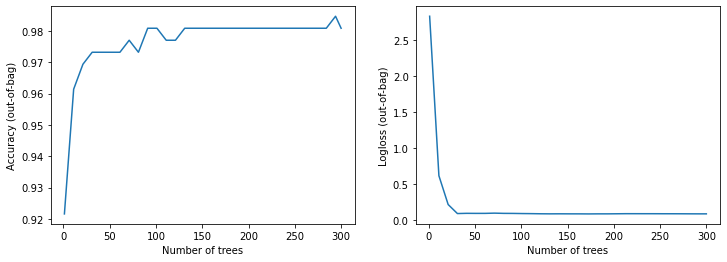

In [45]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()